<a href="https://colab.research.google.com/github/VISHAL4411835/Resume-Screening/blob/main/Resume_Screening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Library and module**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier


**Importing Dataset**

In [4]:
dataset = pd.read_csv('/content/UpdatedResumeDataSet.csv')
dataset['cleaned_resume'] = ''
dataset.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


**Finding unique category of resumes**

In [5]:
print('Distinct Category of resume: ')
print(dataset['Category'].unique())

Distinct Category of resume: 
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


**Finding the frequency of each distinct category of resume**

In [6]:
print('Number of Distinct Category of resume: ')
print(dataset['Category'].value_counts())

Number of Distinct Category of resume: 
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Operations Manager           40
Data Science                 40
ETL Developer                40
Sales                        40
Mechanical Engineer          40
Blockchain                   40
Arts                         36
Database                     33
PMO                          30
Health and fitness           30
Electrical Engineering       30
DotNet Developer             28
Business Analyst             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


**Visual Representation of distinct category and there frequency in bar plot**

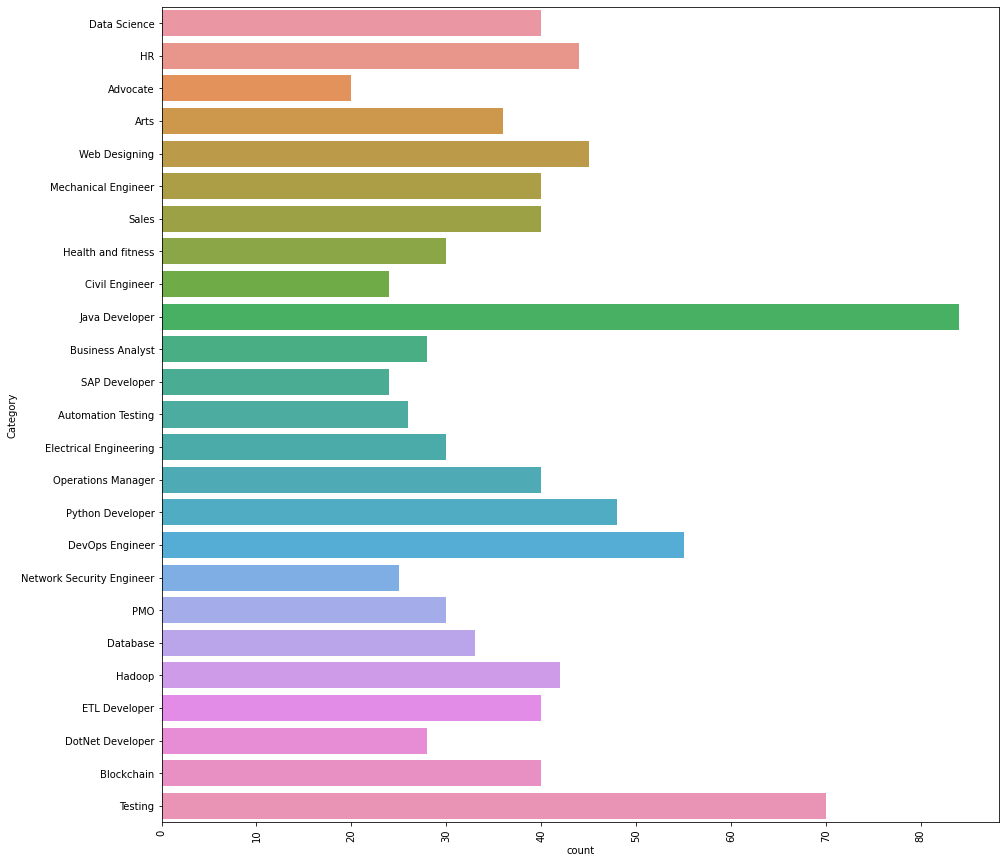

In [7]:
import seaborn as sns
plt.figure(figsize=(15,15))
plt.xticks(rotation = 90)
sns.countplot(y = 'Category' , data = dataset)

**Visual Representation of distinct category and percentage in pie chart**

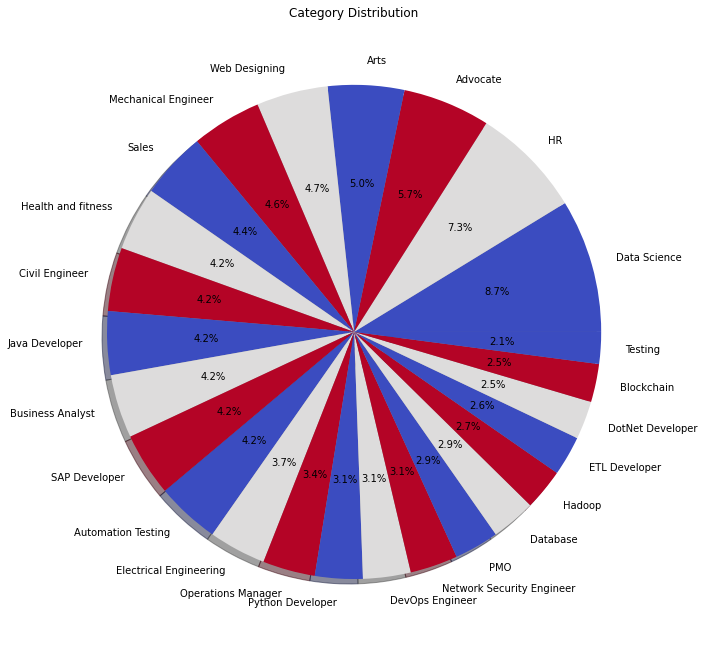

In [8]:
from matplotlib.gridspec import GridSpec
Freq = dataset['Category'].value_counts()
Labels = dataset['Category'].unique()

plt.figure(1,figsize = (25,25))
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('coolwarm')

colors = [cmap(i) for i in np.linspace(0,1,3)]
plt.subplot(2,2,1)
plt.title('Category Distribution')

spie = plt.pie(Freq, labels = Labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

**By the help of cleanresume function we clean the resume(Remove URL, hashtags, mentioned, special character and punctuations)**

In [9]:
import re
def cleanresume(resume):
  resume = re.sub('http\S+\s*','',resume)      # remove URL
  resume = re.sub('RT|cc','',resume)           # remove RT and cc
  resume = re.sub('#\S+','',resume)            # remove Hastage
  resume = re.sub('@\S+','',resume)            # remove Mentions
  resume = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""),'',resume)  # remove panctuations
  resume = re.sub(r'[^\x00-\x7f]',r' ',resume) 
  resume = re.sub('\s+',' ',resume)            #remove extra whitespace
  return resume

dataset['cleaned_resume'] = dataset.Resume.apply(lambda x : cleanresume(x)) 

**Wordcloud**

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[('Details', 484), ('Exprience', 446), ('months', 376), ('company', 326), ('description', 310), ('1', 290), ('year', 228), ('January', 216), ('Less', 204), ('Data', 196), ('data', 192), ('Maharashtra', 166), ('6', 160), ('Skill', 160), ('Science', 154), ('Python', 148), ('College', 140), ('The', 126), ('project', 126), ('like', 126), ('Education', 122), ('Learning', 116), ('I', 116), ('India', 114), ('University', 112), ('Web', 106), ('Machine', 104), ('using', 104), ('monthsCompany', 102), ('time', 92), ('Project', 92), ('Mumbai', 90), ('Pune', 90), ('Arts', 90), ('learning', 86), ('SQL', 84), ('application', 84), ('Engineering', 78), ('24', 76), ('various', 76), ('Software', 76), ('Responsibilities', 76), ('Nagpur', 76), ('development', 74), ('Management', 7

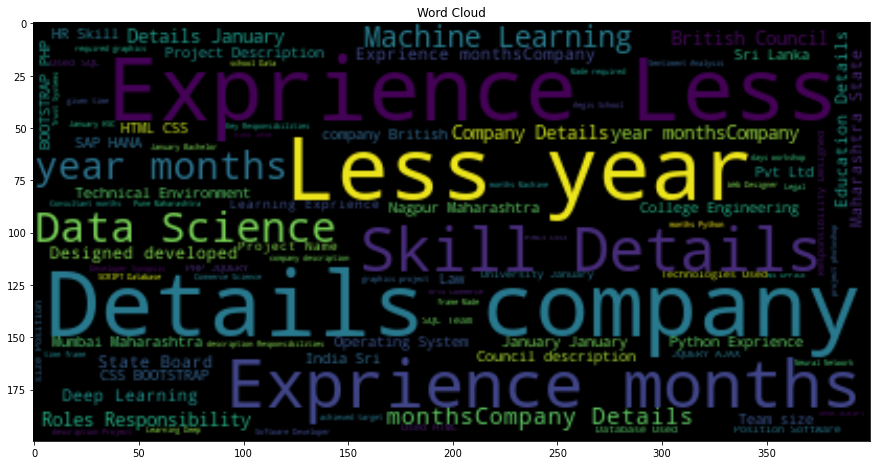

In [16]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

OneSetOfStopWord = set(stopwords.words('english') + ['``',"''"])
totalword = []
Sentences = dataset['Resume'].values
CleanedSentences = ""

for i in range(0,160):
  CleanText = cleanresume(Sentences[i])
  CleanedSentences += CleanText
  requirewords = nltk.word_tokenize(CleanText)
  for word in requirewords:
    if word not in OneSetOfStopWord and word not in string.punctuation:
      totalword.append(word)

wordfreq = nltk.FreqDist(totalword)
mostcommon = wordfreq.most_common(50)
print(mostcommon)

WC = WordCloud().generate(CleanedSentences)
plt.figure(figsize=(15,15))
plt.imshow(WC,interpolation = 'bilinear')
plt.title('Word Cloud')
plt.show()

**Label Encoder for Resume Category**

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
col_indx = ['Category']
for i in col_indx:
  dataset[i] = le.fit_transform(dataset[i])

**Training Machine Learning Model for Resume Screening**

In [ ]:
form sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

Requared_text = dataset['cleaned_resume'].values
Target_text = dataset['Category'].values
